### using PCA and KNN


In [1]:
import pandas as pd 

df_train = pd.read_csv('/home/dev_ws/ML/data/mnist_train.csv')
df_test = pd.read_csv('/home/dev_ws/ML/data/mnist_test.csv')

df_train.shape, df_test.shape

/tmp/ipykernel_19875/3028653968.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


((60000, 785), (10000, 785))

In [2]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np 

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [5]:
import random

samples = random.choices(population = range(0, 60000), k = 16)
samples

[46270,
 28743,
 26295,
 35801,
 49575,
 44103,
 38478,
 36380,
 8847,
 41517,
 30363,
 59448,
 27893,
 24725,
 33516,
 21815]

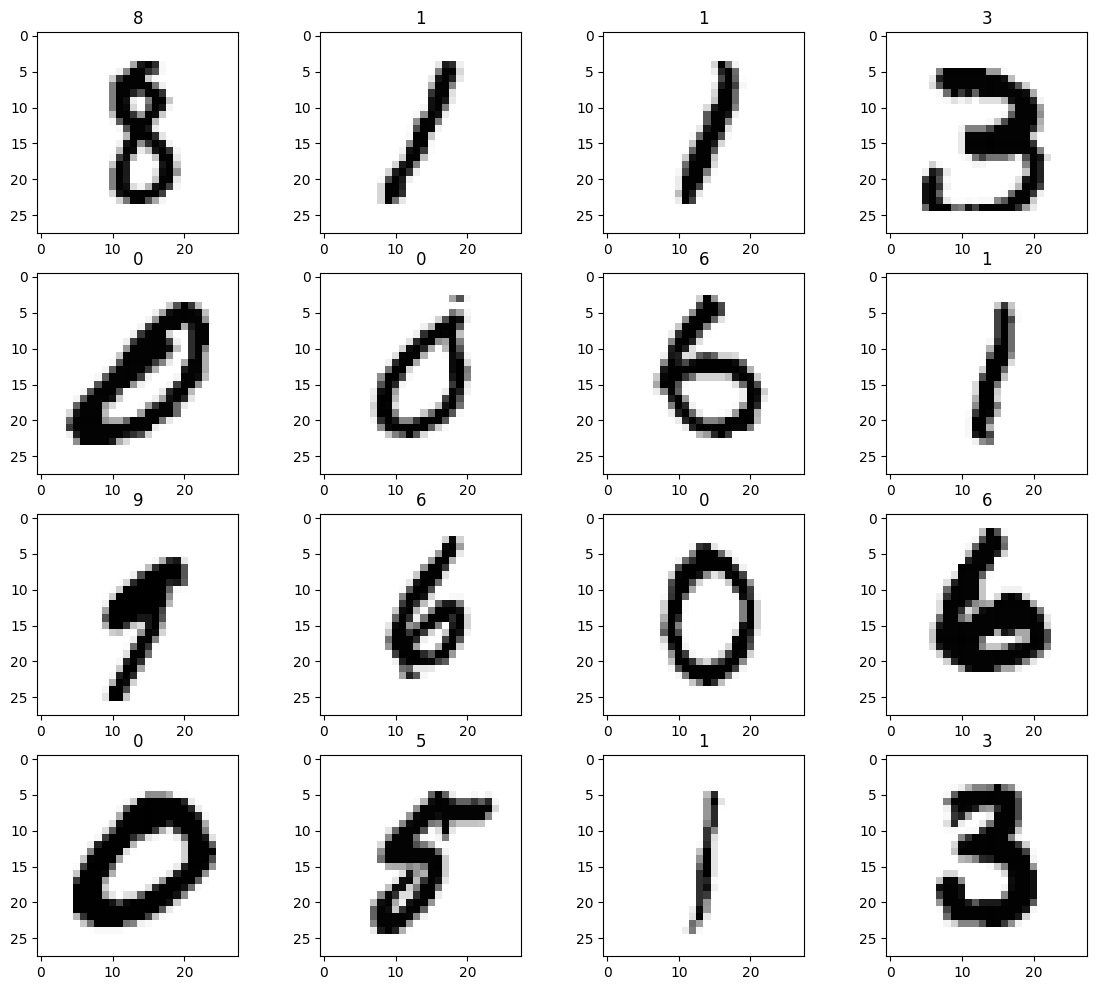

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title(y_train[n])
    
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

print('Fit time : ', time.time() - start_time)

Fit time :  0.2378864288330078


In [8]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  19.897777318954468
0.9688


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state=13)
grid = GridSearchCV(pipe, parameters, cv = kf, n_jobs = -1, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [10]:
print("Best score: %0.3f" % grid.best_score_)
print("Best parameters set : ")

best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.931
Best parameters set : 
	clf__n_neighbors: 10
	pca__n_components: 10


In [11]:
accuracy_score(y_test, grid.best_estimator_.predict(X_test))

0.9288

In [12]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))
    
results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



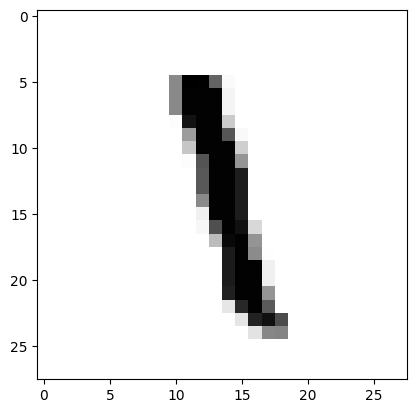

Answer is :  [1]
Real Label is :  1


In [13]:
n = 700

plt.imshow(X_test[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
plt.show()


print('Answer is : ', grid.best_estimator_.predict(X_test[n].reshape(1,784)))
print('Real Label is : ', y_test[n])



In [14]:
preds = grid.best_estimator_.predict(X_test)
preds

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

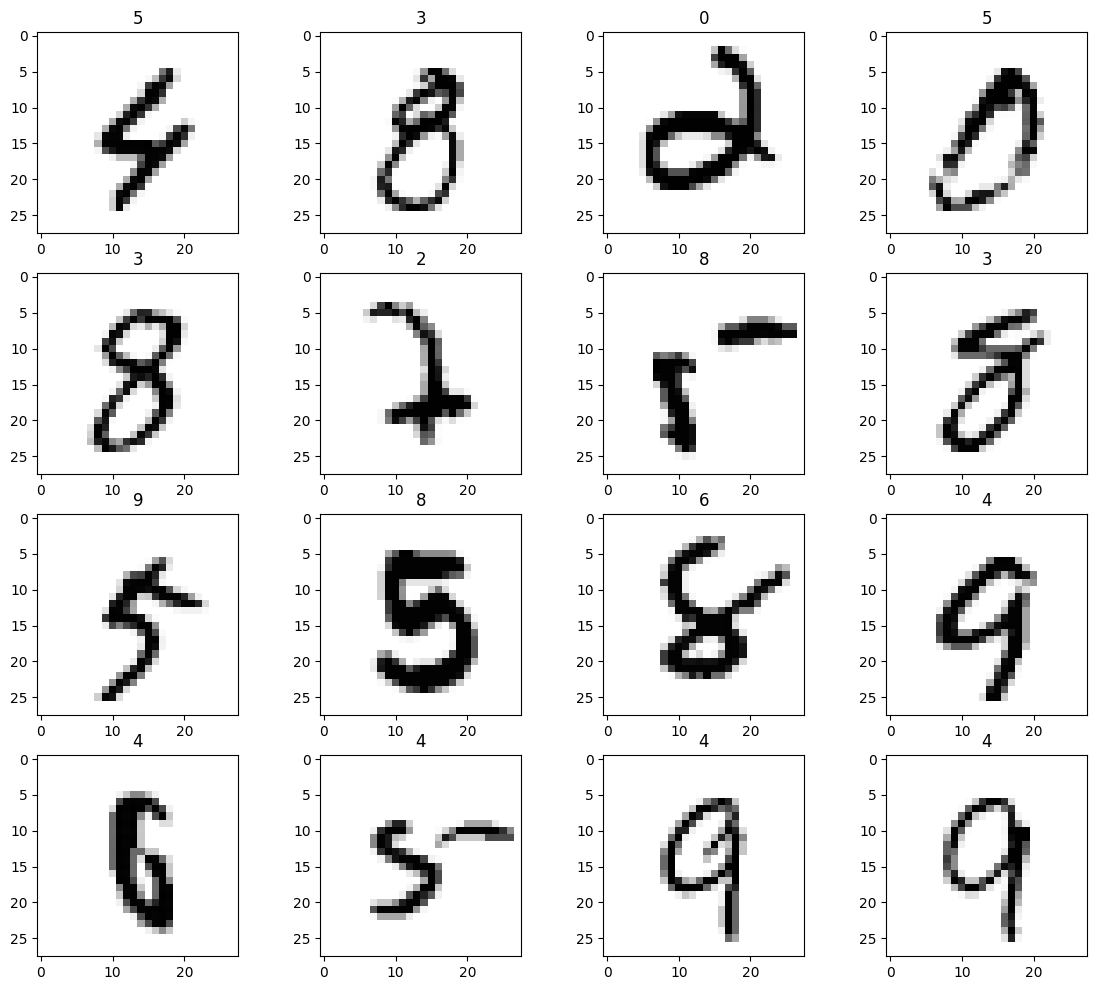

In [19]:
wrong_results = X_test[y_test != preds]
samples = random.choices(population = range(0, wrong_results.shape[0]), k = 16)

plt.figure(figsize = (14, 12))


for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(wrong_results[n].reshape(28, 28), cmap = 'Greys',
               interpolation='nearest')
    plt.title(grid.best_estimator_.predict(wrong_results[n].reshape(1,784))[0])
    
plt.show()
